<a href="https://colab.research.google.com/github/ABHISHEK-DEY-64150/Machine_learning/blob/main/Multiple_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x = [[2,800],[2,1000],[3,1200],[3,1400],[3,1500], [4,1800], [4,2000], [5,2500]]
y = [2000,3000,4000,4200,4500,5000,5500,6500]

In [ ]:
#Loading The Rooms,Area and Price into pandas DataFrame

df = pd.DataFrame(x,columns = ['Rooms','Area'])
df['Price(k BDT)'] = pd.Series(y)
df

,Rooms,Area,Price(k BDT)
0,2,800,2000
1,2,1000,3000
2,3,1200,4000
3,3,1400,4200
4,3,1500,4500
5,4,1800,5000
6,4,2000,5500
7,5,2500,6500


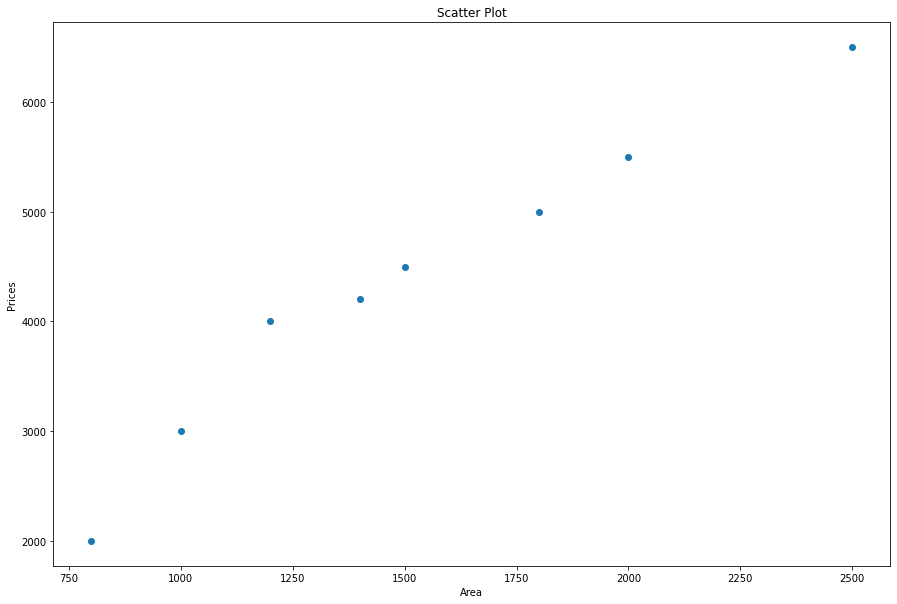

In [ ]:
#Price vs Area scatter plot

plt.scatter(df['Area'],df['Price(k BDT)'])
plt.title("Scatter Plot")
plt.xlabel('Area')
plt.ylabel('Prices')
plt.show()

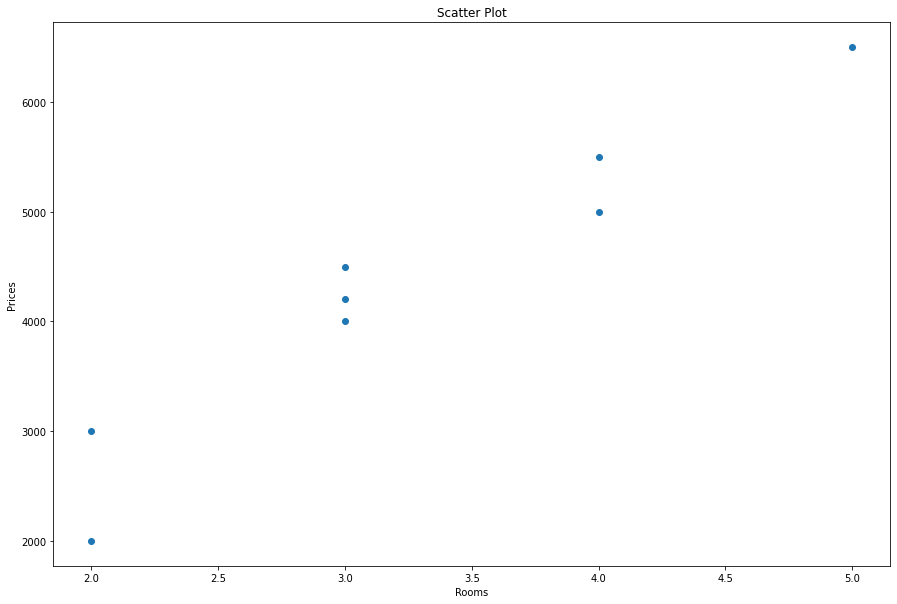

In [ ]:
# Price vs Number of Rooms scatter plot
plt.title("Scatter Plot")
plt.xlabel('Rooms')
plt.ylabel('Prices')
plt.scatter(df['Rooms'],df['Price(k BDT)'])
plt.show()

In [ ]:
#Using multiple linear regression

# Y = beta0+beta1*x1+beta2*x2

#here x1 represents the number of rooms & x2 represents the Area.Y represents the predicted prices.

X = df.values[:,0:2]
Y = df.values[:,2:]
print('Features matrix = ',X)
print('Actual price matrix = ',Y)

#The number of train data

m = len(Y)
print('The number of training data = ',m)

Features matrix =  [[   2  800]
 [   2 1000]
 [   3 1200]
 [   3 1400]
 [   3 1500]
 [   4 1800]
 [   4 2000]
 [   5 2500]]
Actual price matrix =  [[2000]
 [3000]
 [4000]
 [4200]
 [4500]
 [5000]
 [5500]
 [6500]]
The number of training data =  8


In [ ]:
#Feature normalization

#mean of every features or independant variables

mean = np.mean(X,axis = 0)
print('The mean of predictors or each columns = ',mean)

#standered daviation of each features

std = np.std(X, axis= 0, ddof = 1)

print('standered daviation of each column = ',std)

X_normalized_value = (X - mean)/std

X = X_normalized_value

print('The normalized feature values = ',X_normalized_value)

The mean of predictors or each columns =  [   3.25 1525.  ]
standered daviation of each column =  [  1.03509834 557.41751472]
The normalized feature values =  [[-1.20761473 -1.30064087]
 [-1.20761473 -0.94184339]
 [-0.24152295 -0.58304591]
 [-0.24152295 -0.22424843]
 [-0.24152295 -0.04484969]
 [ 0.72456884  0.49334654]
 [ 0.72456884  0.85214402]
 [ 1.69066062  1.74913772]]


In [ ]:
X = np.hstack((np.ones((m,1)), X))
print(X)

[[ 1.         -1.20761473 -1.30064087]
 [ 1.         -1.20761473 -0.94184339]
 [ 1.         -0.24152295 -0.58304591]
 [ 1.         -0.24152295 -0.22424843]
 [ 1.         -0.24152295 -0.04484969]
 [ 1.          0.72456884  0.49334654]
 [ 1.          0.72456884  0.85214402]
 [ 1.          1.69066062  1.74913772]]


In [ ]:
# Gradient Descent Optimization

beta = np.zeros(3)
iterations = 6000
n = .002

cost = []

for i in range(iterations):
  pred = X.dot(beta)
  err = np.subtract(pred,y)
  beta = beta - (n / m) * X.transpose().dot(err)
  sqrErr = np.square(err)
  J = 1/(2 * m) * err.transpose().dot(err)
  cost.append(J)


In [ ]:
print('The final value of beta would be = ',beta)

The final value of beta would be =  [4337.4736678   604.17891979  776.15859206]


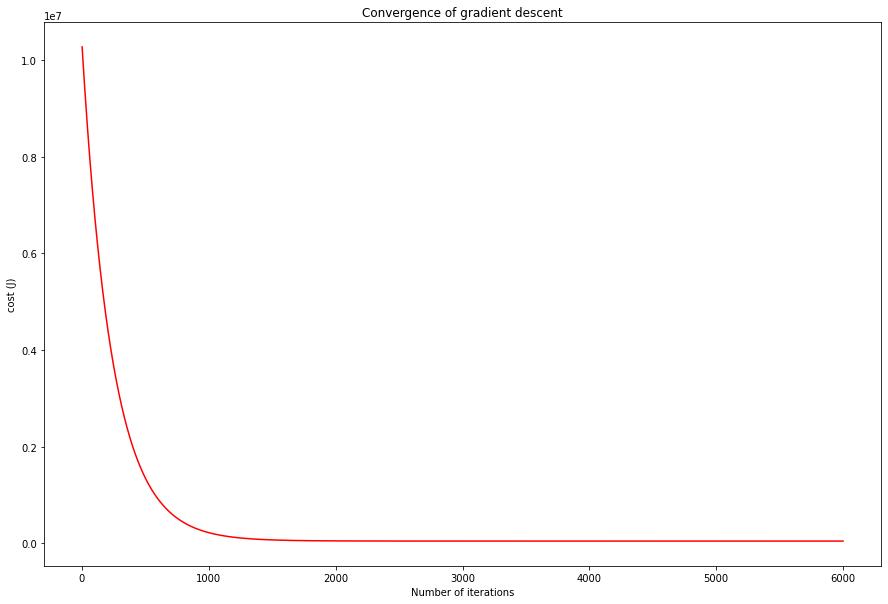

In [ ]:
#Plot for the changes in error

plt.plot(range(1, iterations +1), cost, color ='red')
plt.rcParams["figure.figsize"] = (15,10)
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent")
plt.show()

In [ ]:
#Generating test data

normalize_test_data = ((np.array([8, 2500]) - mean) / std)
normalize_test_data = np.hstack((np.ones(1), normalize_test_data))
price = normalize_test_data.dot(beta)
print('Predicted price of a 8 rooms and 2500 sqare feet house would be = ', price)

Predicted price of a 8 rooms and 2500 sqare feet house would be =  8467.620313903608


In [ ]:
#Showing the predicted prices for the given dataset

Price = X.dot(beta)

print('Predicted prices according to the multiple liear model = ',Price)

Predicted prices according to the multiple liear model =  [2598.35472077 2876.83846825 3739.01450565 4017.49825314 4156.74012688
 5158.15803803 5436.64178551 6716.54344414]


In [ ]:
#Calculating erros in predicted values with the real prices

error = np.subtract(Price, y)
print(error)

[ 598.35472077 -123.16153175 -260.98549435 -182.50174686 -343.25987312
  158.15803803  -63.35821449  216.54344414]


In [ ]:
#Squared errors 

sqrError = np.square(error)
print(sqrError)

[358028.37186295  15168.76290305  68113.42825877  33306.88760756
 117827.34049418  25013.9649925    4014.26334327  46891.06320049]


In [ ]:
# Calculating the cost

J = 1 / (2 * m) * np.sum(sqrError)
print('The loss = ',J)

The loss =  41772.755166423194


In [ ]:
#Implementing multiple_Linear Regression using python library

from sklearn import linear_model
from sklearn import metrics

In [ ]:
df2 = pd.DataFrame(x,columns = ['Rooms','Area'])
df2['Price'] = pd.Series(y)
reg = linear_model.LinearRegression()
reg.fit(df2[['Rooms', 'Area']], df2.Price)
df2

,Rooms,Area,Price
0,2,800,2000
1,2,1000,3000
2,3,1200,4000
3,3,1400,4200
4,3,1500,4500
5,4,1800,5000
6,4,2000,5500
7,5,2500,6500


In [ ]:
# The values of regression coefficients

print(reg.coef_)

[264.08450704   1.98591549]


In [ ]:
# The regression intercept

print(reg.intercept_)

450.7042253521149


In [ ]:
#Showing the predicted prices for the given dataset
y_pred = reg.predict(df2[['Rooms', 'Area']])

print(y_pred)

[2567.6056338  2964.78873239 3626.05633803 4023.23943662 4221.83098592
 5081.69014085 5478.87323944 6735.91549296]


In [ ]:
#Calculating the cost

loss = metrics.mean_squared_error(y,y_pred)/2

print(loss)

39665.49295774645


We see that the cost using the python library is 39665.49 and using our model of multiple linear regression cost is 41772.755
The Python library regression model works better than our model in predicting the price.